In [49]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
import pandas as pd
from gradient_boosting import GradientBoostRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV

In [53]:
df = pd.DataFrame(fetch_california_housing().data, columns=fetch_california_housing().feature_names)
df['Target'] = fetch_california_housing().target

In [55]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [57]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [59]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [62]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


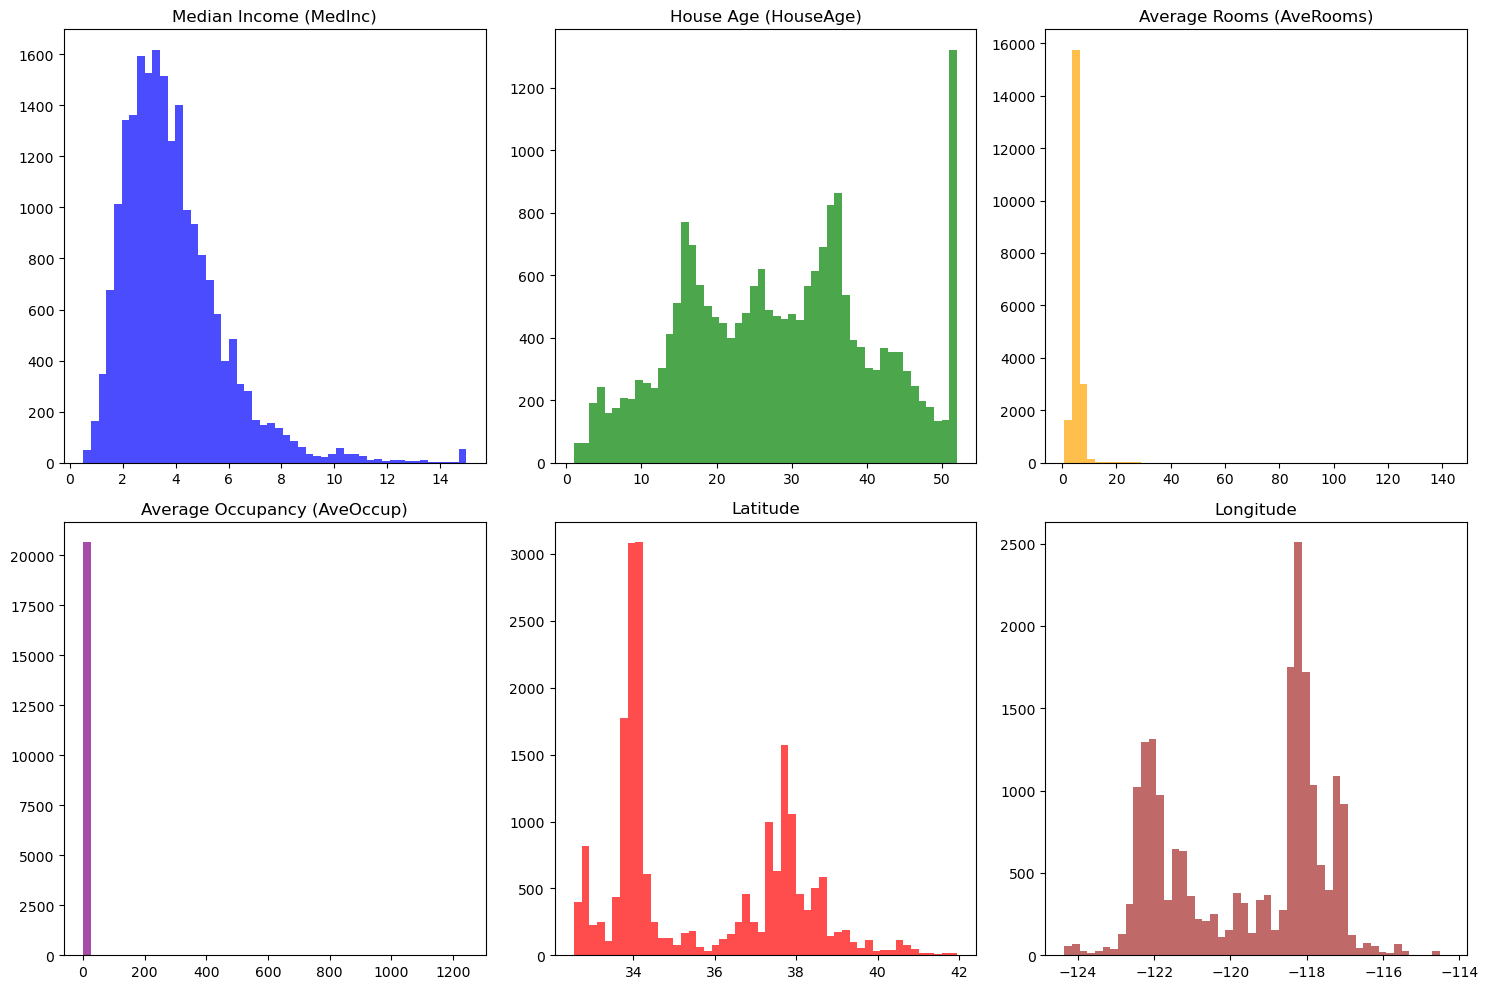

In [67]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].hist(df['MedInc'], bins=50, color='blue', alpha=0.7)
ax[0, 0].set_title('Median Income (MedInc)')

ax[0, 1].hist(df['HouseAge'], bins=50, color='green', alpha=0.7)
ax[0, 1].set_title('House Age (HouseAge)')

ax[0, 2].hist(df['AveRooms'], bins=50, color='orange', alpha=0.7)
ax[0, 2].set_title('Average Rooms (AveRooms)')

ax[1, 0].hist(df['AveOccup'], bins=50, color='purple', alpha=0.7)
ax[1, 0].set_title('Average Occupancy (AveOccup)')

ax[1, 1].hist(df['Latitude'], bins=50, color='red', alpha=0.7)
ax[1, 1].set_title('Latitude')

ax[1, 2].hist(df['Longitude'], bins=50, color='brown', alpha=0.7)
ax[1, 2].set_title('Longitude')

plt.tight_layout()
plt.show()

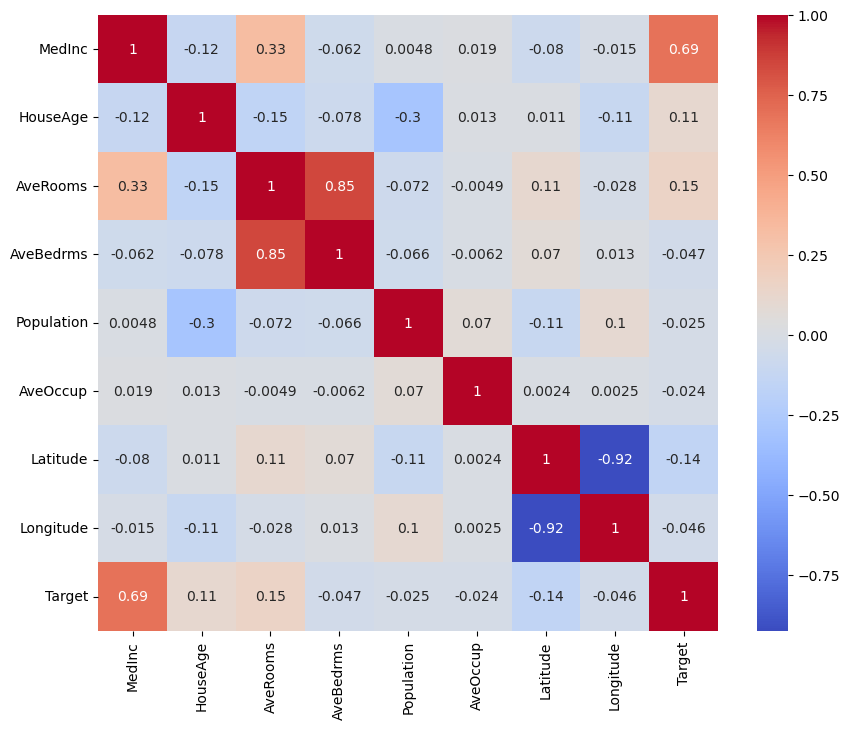

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [70]:
X = df.drop('Target', axis=1)
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [74]:
gbr = GradientBoostRegression()
gbr.fit(x_train, y_train)

In [76]:
y_pred_gbr = gbr.predict(x_test)

In [77]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f'Mean Squared Error (Custom Gradient Boosting): {mse_gbr}')

Mean Squared Error (Custom Gradient Boosting): 0.2883661880129026


In [81]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Mean Squared Error (Decision Tree): {mse_tree}')

Mean Squared Error (Decision Tree): 0.6325363214073457


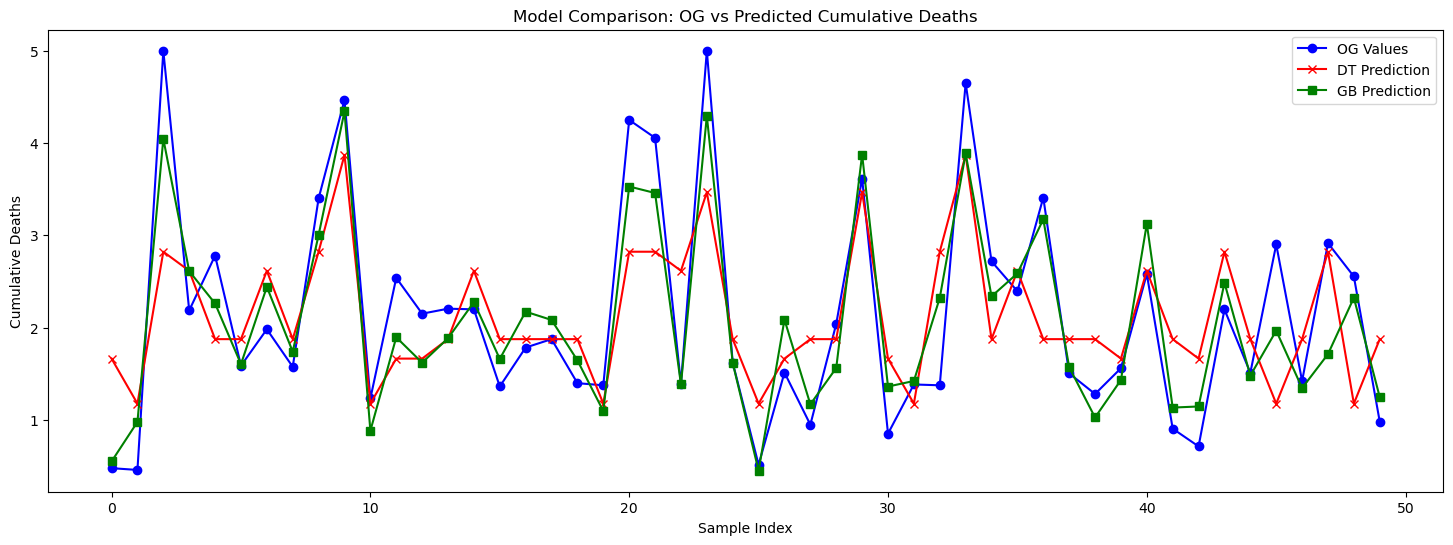

In [82]:
plt.figure(figsize=(18, 6))
plt.plot(y_test[:50].values, label='OG Values', marker='o', color='blue')
plt.plot(y_pred_tree[:50], label='DT Prediction', marker='x', color='red')
plt.plot(y_pred_gbr[:50], label='GB Prediction', marker='s', color='green')
plt.title('Model Comparison: OG vs Predicted Cumulative Deaths')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative Deaths')
plt.legend()
plt.show()

In [ ]:
param_grid = {
    'num_trees': [100, 150, 200],
    'learn_rate': [0.01, 0.05, 0.1, 0.15],
    'tree_depth': [3, 4],
    'l2reg': [0.001, 0.01, 0.1]
}

gbr = GradientBoostRegression()

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Best Model: {mse}")

In [ ]:
gbr_hpt = GradientBoostRegression(200,0.15,4,0.01)
gbr_hpt.fit(x_train, y_train)
y_pred_hpt = gbr_hpt.predict(x_test)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:50].values, label='OG Values', marker='o', color='blue')
plt.plot(y_pred_tree[:50], label='DT Prediction', marker='x', color='red')
plt.plot(y_pred_gbr[:50], label='GB Prediction', marker='s', color='green')
plt.plot(y_pred_hpt[:50], label='GB Prediction with HPT', marker='s', color='cyan')
plt.title('Model Comparison: OG vs Predicted Cumulative Deaths')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative Deaths')
plt.legend()
plt.show()